# Try to Improve Gabor Filters

In our previous notebook we saw two things:

1. Our Gabor filters seemed to improve performance over random weights
2. Our Gabor filters did not do what we wanted them to do. 

This begs the question: If we can get our Gabor filters to detect edges properly, will we see ever greater improvements in training speed and final performance?

In [40]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from lucent.optvis import render
from fastai.vision.models import resnet50

## Original filter

In [121]:
def get_filter(ksize=(7,7), sigma=3, theta=1*np.pi/4, lambd=8*np.pi/4, gamma=0):
    phi = 0

    filter = cv2.getGaborKernel(ksize, sigma, theta, lambd, gamma, psi=0,  ktype=cv2.CV_32F)
    return filter

    

Mean:	 0.16676901
Std:	 0.5865708


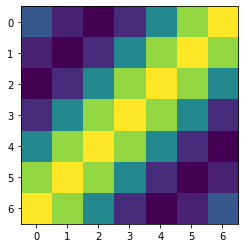

In [122]:
filter = get_filter()

print("Mean:\t", filter.mean())
print("Std:\t", filter.std())

plt.imshow(filter)

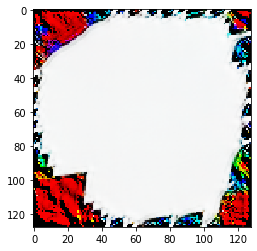

In [123]:
model = resnet50(pretrained=False).cuda()
model.conv1.weight.data[0,:,:,:] = torch.from_numpy(filter).cuda()
model = model.cuda()

result = render.render_vis(model, "relu:" + str(0), show_image=False, progress=False, thresholds=(512,))
plt.imshow(result[0][0])

## Subtract Mean from Filters

When we create our filters, they're not zero-centered and seem to have a positive mean. I think this makes it so the filters "prefer" to activate on large values which is why we're getting so much white in the above output.

Let's try subtracting the mean from our filter.

Mean:	 -6.690317e-09
Std:	 0.5865708


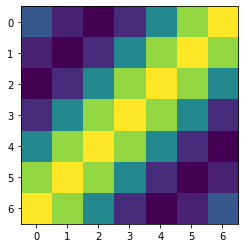

In [124]:
filter = get_filter()
filter = filter - filter.mean()
print("Mean:\t", filter.mean())
print("Std:\t", filter.std())

plt.imshow(filter)

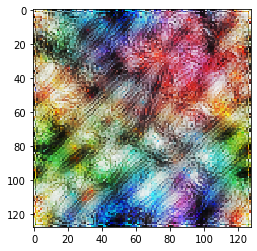

In [125]:
model = resnet50(pretrained=False).cuda()
model.conv1.weight.data[0,:,:,:] = torch.from_numpy(filter).cuda()
model = model.cuda()

result = render.render_vis(model, "relu:" + str(0), show_image=False, progress=False, thresholds=(512,))
plt.imshow(result[0][0])

That's interesting, it seems to react to some kind of "edge" going from the bottom left to the top right.

I'm surprised that there is so much color present. I figured it would react to black and white because all channels had identical values.

## Divide by Standard Deviation

Let's also try divding by standard deviation.

Mean:	 -2.6761269e-08
Std:	 1.0


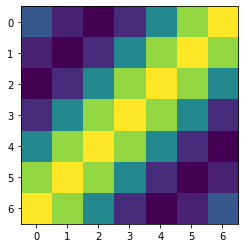

In [126]:
filter = get_filter()
filter = (filter - filter.mean())/filter.std()
print("Mean:\t", filter.mean())
print("Std:\t", filter.std())

plt.imshow(filter)

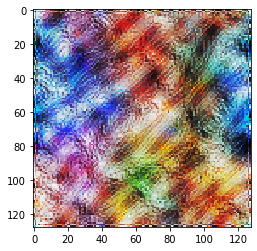

In [127]:
model = resnet50(pretrained=False).cuda()
model.conv1.weight.data[0,:,:,:] = torch.from_numpy(filter).cuda()
model = model.cuda()

result = render.render_vis(model, "relu:" + str(0), show_image=False, progress=False, thresholds=(512,))
plt.imshow(result[0][0])

Seems roughly the same as above.

# Investigate Other Parameters

## Changing Sigma

Sigma represents wavelength of the filter. Let's try with a few different values.

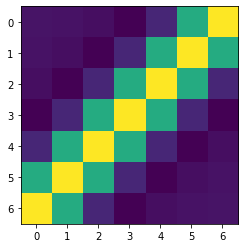

mean:	 0.2882804
std:	 0.38315514


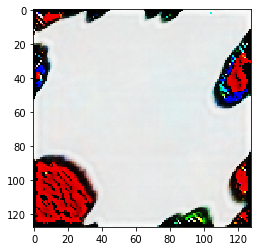

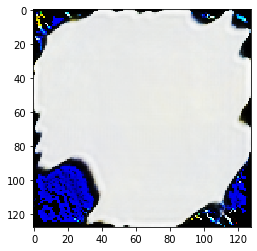

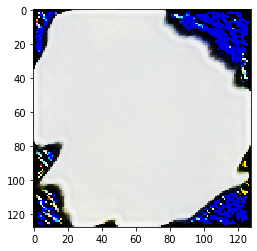

In [184]:
filter = get_filter(sigma=1)
plt.imshow(filter)
plt.show()
print("mean:\t", filter.mean())
print("std:\t", filter.std())
model = resnet50(pretrained=False).cuda()
model.conv1.weight.data[0,:,:,:] = torch.from_numpy(filter).cuda()
model = model.cuda()

for i in range(3):
    result = render.render_vis(model, "relu:" + str(0), show_image=False, progress=False, thresholds=(256,))
    plt.imshow(result[0][0])
    plt.show()

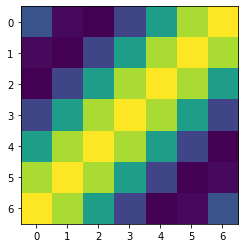

mean:	 0.07694955
std:	 0.7043244


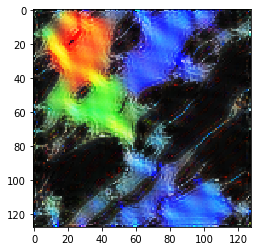

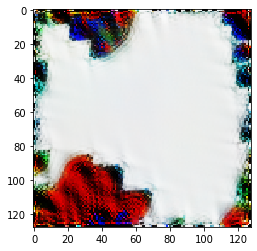

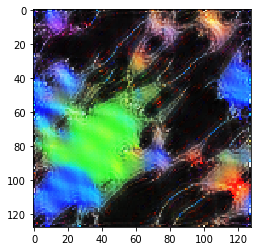

In [182]:
filter = get_filter(sigma=10)
plt.imshow(filter)
plt.show()
print("mean:\t", filter.mean())
print("std:\t", filter.std())
model = resnet50(pretrained=False).cuda()
model.conv1.weight.data[0,:,:,:] = torch.from_numpy(filter).cuda()
model = model.cuda()

for i in range(3):
    result = render.render_vis(model, "relu:" + str(0), show_image=False, progress=False, thresholds=(256,))
    plt.imshow(result[0][0])
    plt.show()

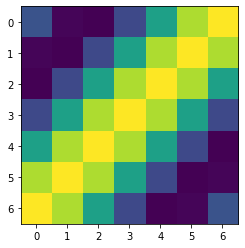

mean:	 0.0652275
std:	 0.7199781


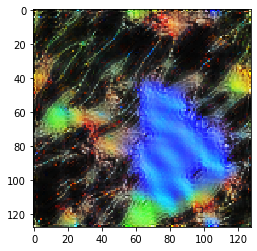

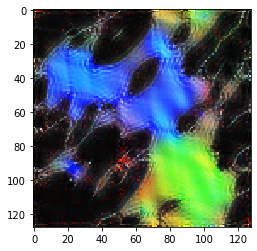

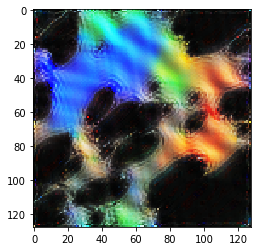

In [186]:
# With large sigma
filter = get_filter(sigma=100)
plt.imshow(filter)
plt.show()
print("mean:\t", filter.mean())
print("std:\t", filter.std())
model = resnet50(pretrained=False).cuda()
model.conv1.weight.data[0,:,:,:] = torch.from_numpy(filter).cuda()
model = model.cuda()

for i in range(3):
    result = render.render_vis(model, "relu:" + str(0), show_image=False, progress=False, thresholds=(256,))
    plt.imshow(result[0][0])
    plt.show()

I have no idea how but it seems to have an impact on the overall "darkness" of the image. Also note how in the final version we start to see edges showing up. This may be a side effect of having a mean closer to zero?

## Changing Lambda

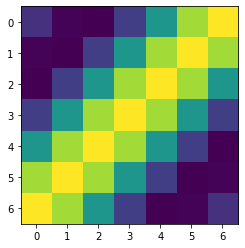

mean:	 0.23822427
std:	 0.5655687


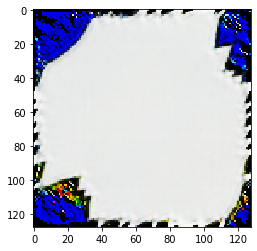

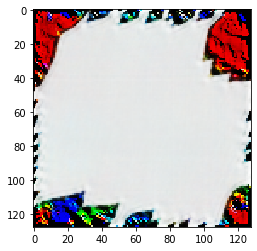

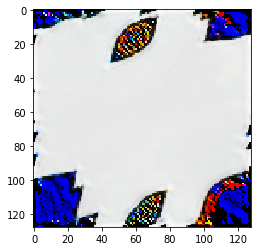

In [187]:
filter = get_filter(lambd=1*np.pi/4)
plt.imshow(filter)
plt.show()
print("mean:\t", filter.mean())
print("std:\t", filter.std())
model = resnet50(pretrained=False).cuda()
model.conv1.weight.data[0,:,:,:] = torch.from_numpy(filter).cuda()
model = model.cuda()

for i in range(3):
    result = render.render_vis(model, "relu:" + str(0), show_image=False, progress=False, thresholds=(256,))
    plt.imshow(result[0][0])
    plt.show()

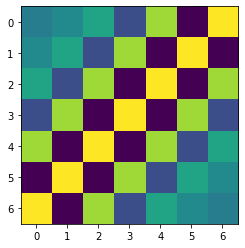

mean:	 0.0089658545
std:	 0.706857


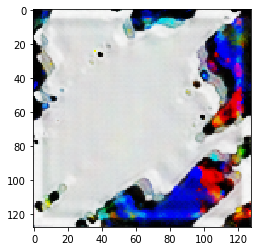

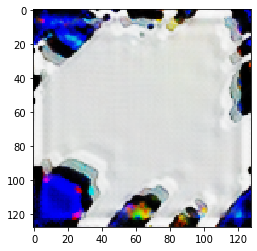

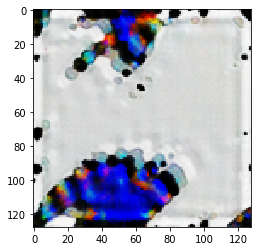

In [188]:
filter = get_filter(lambd=2*np.pi/4)
plt.imshow(filter)
plt.show()
print("mean:\t", filter.mean())
print("std:\t", filter.std())
model = resnet50(pretrained=False).cuda()
model.conv1.weight.data[0,:,:,:] = torch.from_numpy(filter).cuda()
model = model.cuda()

for i in range(3):
    result = render.render_vis(model, "relu:" + str(0), show_image=False, progress=False, thresholds=(256,))
    plt.imshow(result[0][0])
    plt.show()

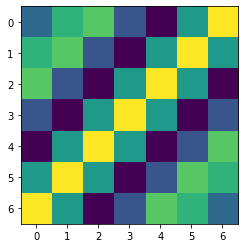

mean:	 0.032205902
std:	 0.60062045


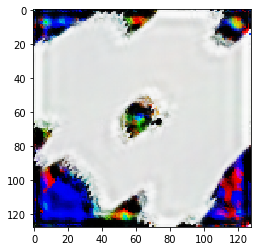

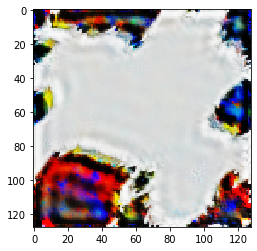

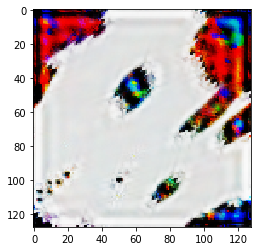

In [189]:
filter = get_filter(lambd=4*np.pi/4)
plt.imshow(filter)
plt.show()
print("mean:\t", filter.mean())
print("std:\t", filter.std())
model = resnet50(pretrained=False).cuda()
model.conv1.weight.data[0,:,:,:] = torch.from_numpy(filter).cuda()
model = model.cuda()

for i in range(3):
    result = render.render_vis(model, "relu:" + str(0), show_image=False, progress=False, thresholds=(256,))
    plt.imshow(result[0][0])
    plt.show()

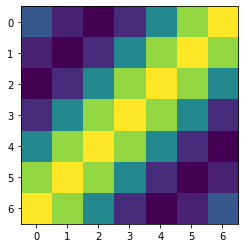

mean:	 0.16676901
std:	 0.5865708


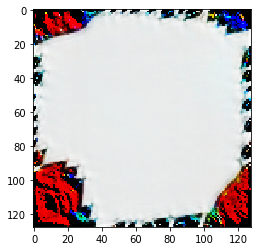

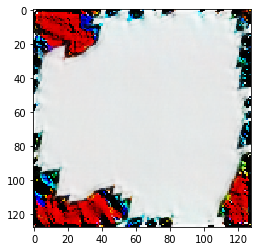

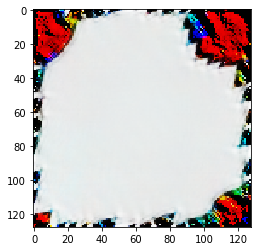

In [190]:
filter = get_filter(lambd=8*np.pi/4)
plt.imshow(filter)
plt.show()
print("mean:\t", filter.mean())
print("std:\t", filter.std())
model = resnet50(pretrained=False).cuda()
model.conv1.weight.data[0,:,:,:] = torch.from_numpy(filter).cuda()
model = model.cuda()

for i in range(3):
    result = render.render_vis(model, "relu:" + str(0), show_image=False, progress=False, thresholds=(256,))
    plt.imshow(result[0][0])
    plt.show()

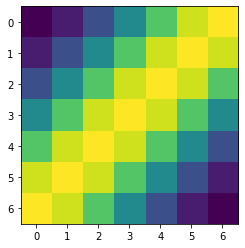

mean:	 0.56364805
std:	 0.38810623


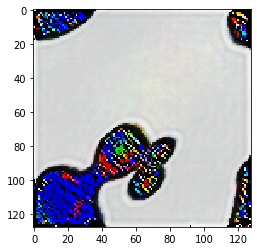

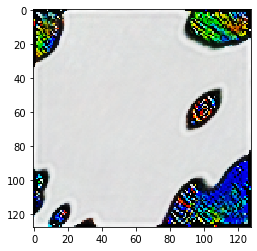

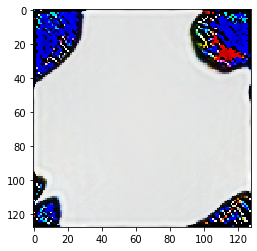

In [191]:
filter = get_filter(lambd=16*np.pi/4)
plt.imshow(filter)
plt.show()
print("mean:\t", filter.mean())
print("std:\t", filter.std())
model = resnet50(pretrained=False).cuda()
model.conv1.weight.data[0,:,:,:] = torch.from_numpy(filter).cuda()
model = model.cuda()

for i in range(3):
    result = render.render_vis(model, "relu:" + str(0), show_image=False, progress=False, thresholds=(256,))
    plt.imshow(result[0][0])
    plt.show()

## Changing Gamma

Apparently this controls the "ellipticity" of the filter. It can stretch it into an ellipsis or compress it into a circle.

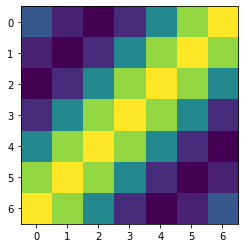

mean:	 0.16676901
std:	 0.5865708


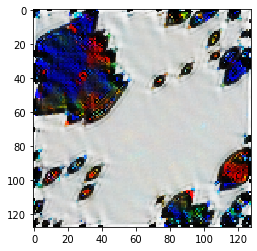

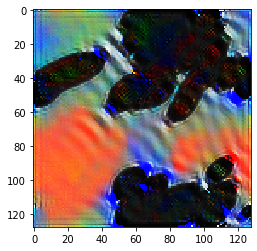

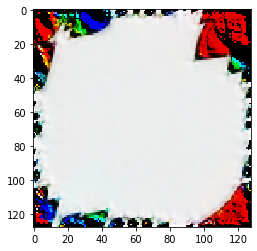

In [193]:
filter = get_filter(gamma=0)
plt.imshow(filter)
plt.show()
print("mean:\t", filter.mean())
print("std:\t", filter.std())
model = resnet50(pretrained=False).cuda()
model.conv1.weight.data[0,:,:,:] = torch.from_numpy(filter).cuda()
model = model.cuda()

for i in range(3):
    result = render.render_vis(model, "relu:" + str(0), show_image=False, progress=False, thresholds=(256,))
    plt.imshow(result[0][0])
    plt.show()

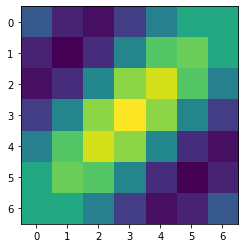

mean:	 0.086055696
std:	 0.47877637


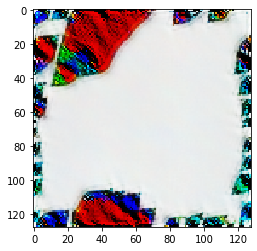

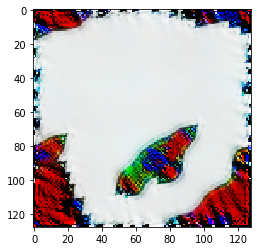

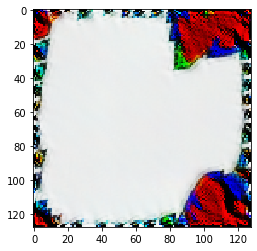

In [194]:
filter = get_filter(gamma=1)
plt.imshow(filter)
plt.show()
print("mean:\t", filter.mean())
print("std:\t", filter.std())
model = resnet50(pretrained=False).cuda()
model.conv1.weight.data[0,:,:,:] = torch.from_numpy(filter).cuda()
model = model.cuda()

for i in range(3):
    result = render.render_vis(model, "relu:" + str(0), show_image=False, progress=False, thresholds=(256,))
    plt.imshow(result[0][0])
    plt.show()

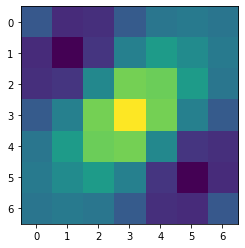

mean:	 0.009819746
std:	 0.37027687


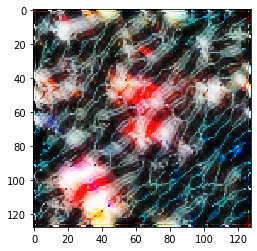

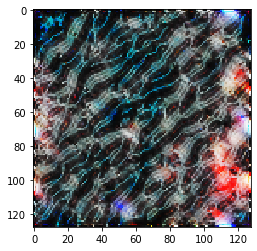

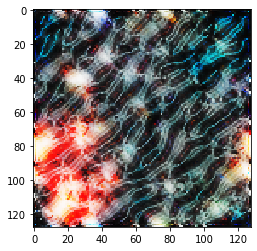

In [195]:
filter = get_filter(gamma=2)
plt.imshow(filter)
plt.show()
print("mean:\t", filter.mean())
print("std:\t", filter.std())
model = resnet50(pretrained=False).cuda()
model.conv1.weight.data[0,:,:,:] = torch.from_numpy(filter).cuda()
model = model.cuda()

for i in range(3):
    result = render.render_vis(model, "relu:" + str(0), show_image=False, progress=False, thresholds=(256,))
    plt.imshow(result[0][0])
    plt.show()

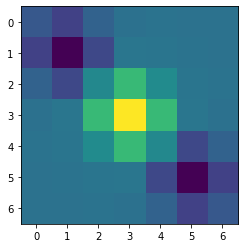

mean:	 -0.011400671
std:	 0.26560426


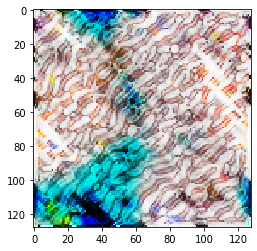

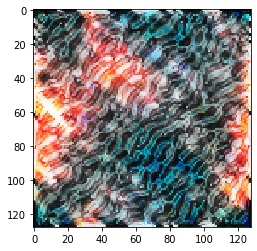

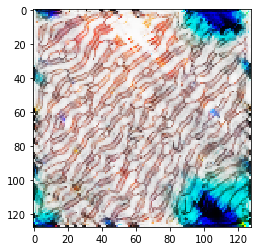

In [196]:
filter = get_filter(gamma=4)
plt.imshow(filter)
plt.show()
print("mean:\t", filter.mean())
print("std:\t", filter.std())
model = resnet50(pretrained=False).cuda()
model.conv1.weight.data[0,:,:,:] = torch.from_numpy(filter).cuda()
model = model.cuda()

for i in range(3):
    result = render.render_vis(model, "relu:" + str(0), show_image=False, progress=False, thresholds=(256,))
    plt.imshow(result[0][0])
    plt.show()

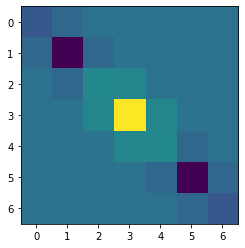

mean:	 -0.007370113
std:	 0.19906247


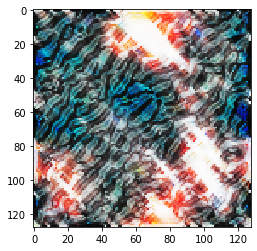

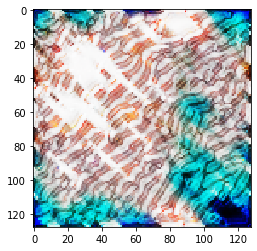

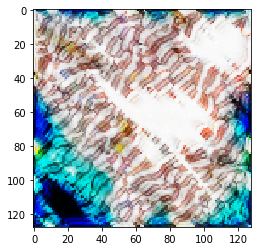

In [197]:
filter = get_filter(gamma=8)
plt.imshow(filter)
plt.show()
print("mean:\t", filter.mean())
print("std:\t", filter.std())
model = resnet50(pretrained=False).cuda()
model.conv1.weight.data[0,:,:,:] = torch.from_numpy(filter).cuda()
model = model.cuda()

for i in range(3):
    result = render.render_vis(model, "relu:" + str(0), show_image=False, progress=False, thresholds=(256,))
    plt.imshow(result[0][0])
    plt.show()

Interestingly we always detect lines in the same direction.

At the end of the day I have no idea which of these would be ideal for our purposes.